In [85]:
import pandas as pd
import numpy as np
import OpenBlender
import json
from matplotlib import pyplot as plt
import seaborn as sns
import panel as pn
import hvplot.pandas
import pandas as pd
from dotenv import load_dotenv
import warnings
import plotly.graph_objs as go
import seaborn as sns
import holoviews as hv
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [141]:
def openBlender_plot():
    data = pd.read_csv('data/input_data.csv')
    plt.subplots(figsize=(10,6))
    target_data = data.copy()
    target_data["target"]=target_data["target"].astype(str)
    plot=sns.histplot(data=target_data,x="target",hue="target",palette=["#d1120f","#006400"],legend="target")
    plt.title("Count of Target Labels")
    plt.legend(title='Label', loc='upper right', labels=['Rise', 'Fall'])
    figure = plt.figure(figsize=(12,6))
    return figure
    

In [142]:
def GoogleTrends_tt_plot():
    history = pd.read_csv('data/gt_history.csv')
    plt.plot(history['loss'], label='train')
    plt.plot(history['val_loss'], label='test')
    plt.title("Test and Train set Loss Value Rate")
    plt.xlabel('Epochs Number', fontsize=12)
    plt.ylabel('Loss Value', fontsize=12)
    plt.legend()
    y = plt.show()
    figure = plt.figure(figsize=(12,6))
    return figure
    


In [143]:
def GoogleTrends_pred_plot():
    train_size=70
    actual = pd.read_csv('data/gt_actual.csv')
    final = pd.read_csv('data/gt_final.csv')
    plt.plot(actual.BTC_USD, 'b', label='Original Set')
    plt.plot(final.BTC_USD[0:train_size], 'r' , label='Training set')
    plt.plot(final.BTC_USD[train_size:], 'g' , label='Predicted/Test set')
    plt.title("Bitcoin Predicted Prices")
    plt.ylabel('BitCoin Price Trend', fontsize=12)
    plt.legend(loc='best')
    figure = plt.figure(figsize=(12,6))
    return figure

    

In [144]:
# Create a Title for the Dashboard

title = pn.pane.Markdown("""
## Crytpo Sentiment
""")

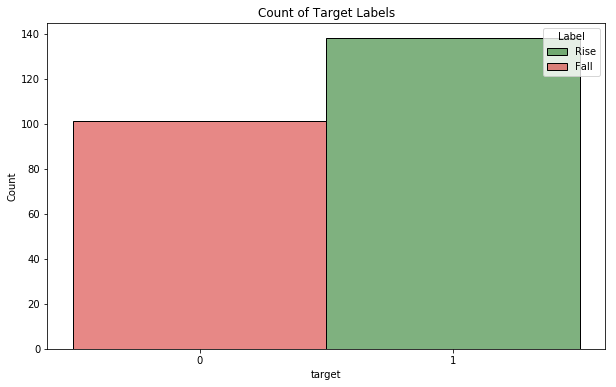

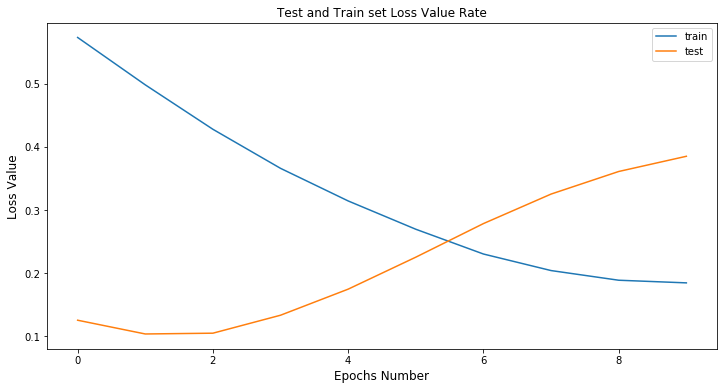

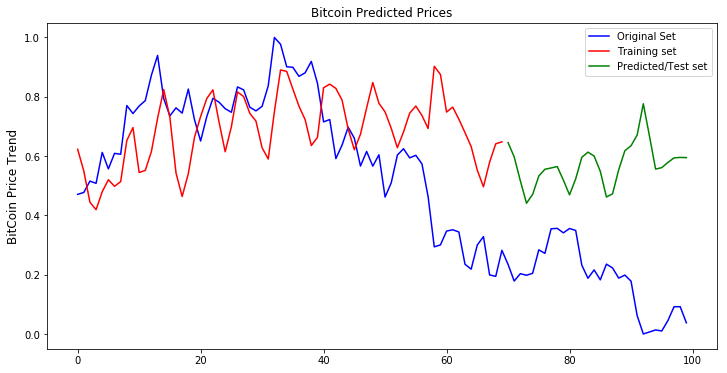

<Figure size 864x432 with 0 Axes>

In [145]:
tabs = pn.Tabs(
    ("OpenBlender", pn.Column(openBlender_plot)),
    ("Google Trends Test&Train", pn.Column(GoogleTrends_tt_plot)),
    ("Google Trends Predictions", pn.Column(GoogleTrends_pred_plot)),
    )


In [146]:
dashboard = pn.Column(title, tabs)
#pn.extension()


Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive01978')
        [1] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive01985')
        [2] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive01992')
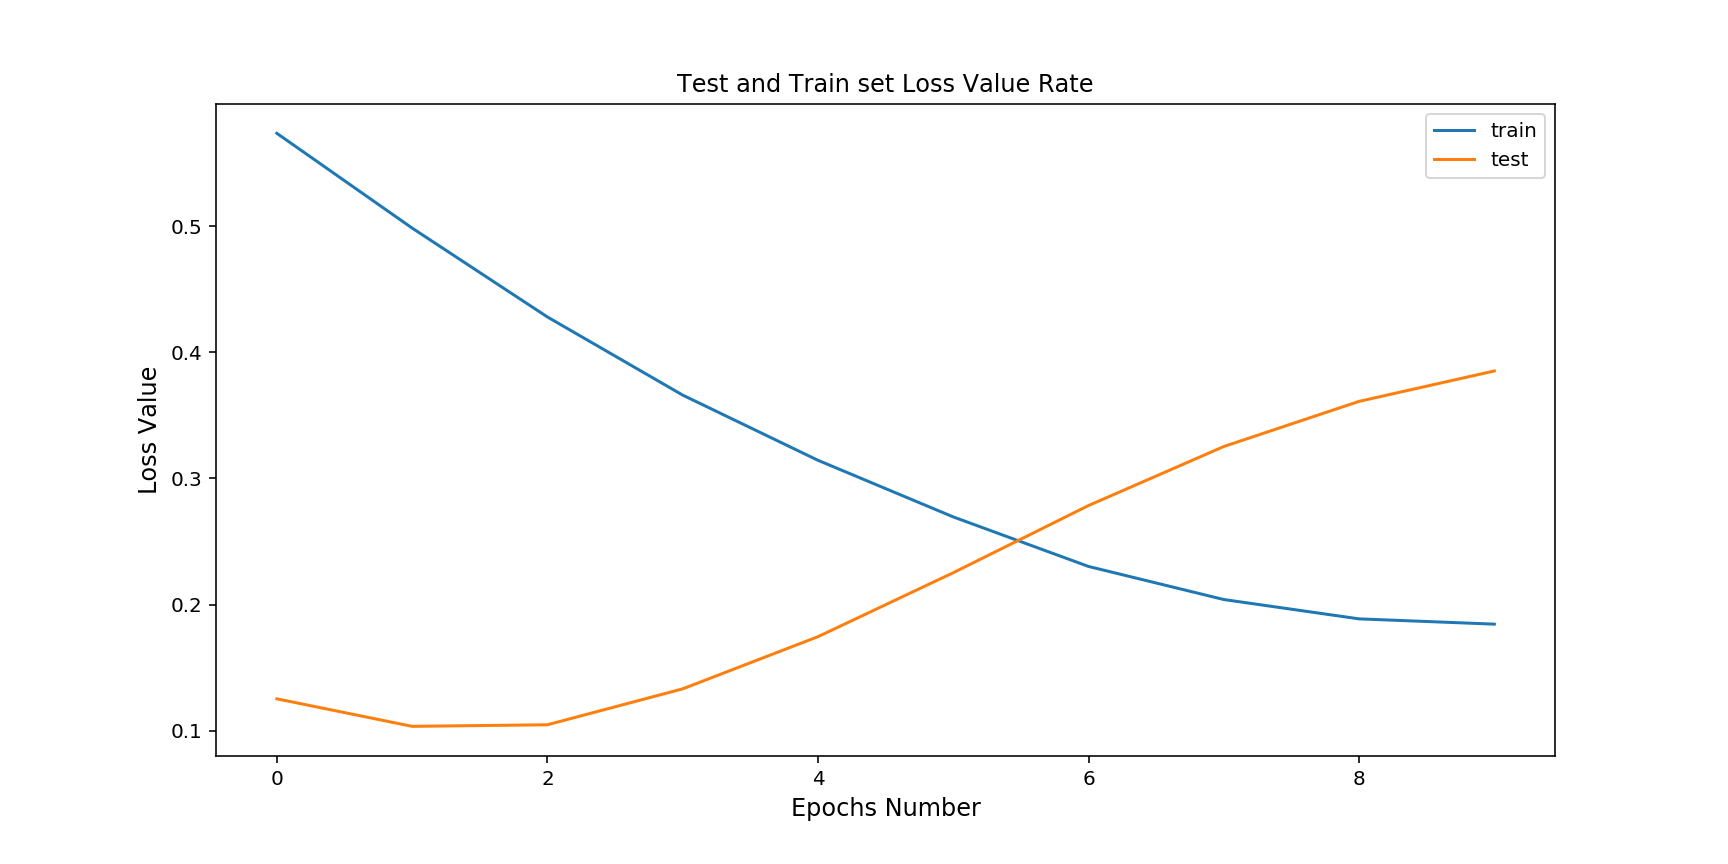
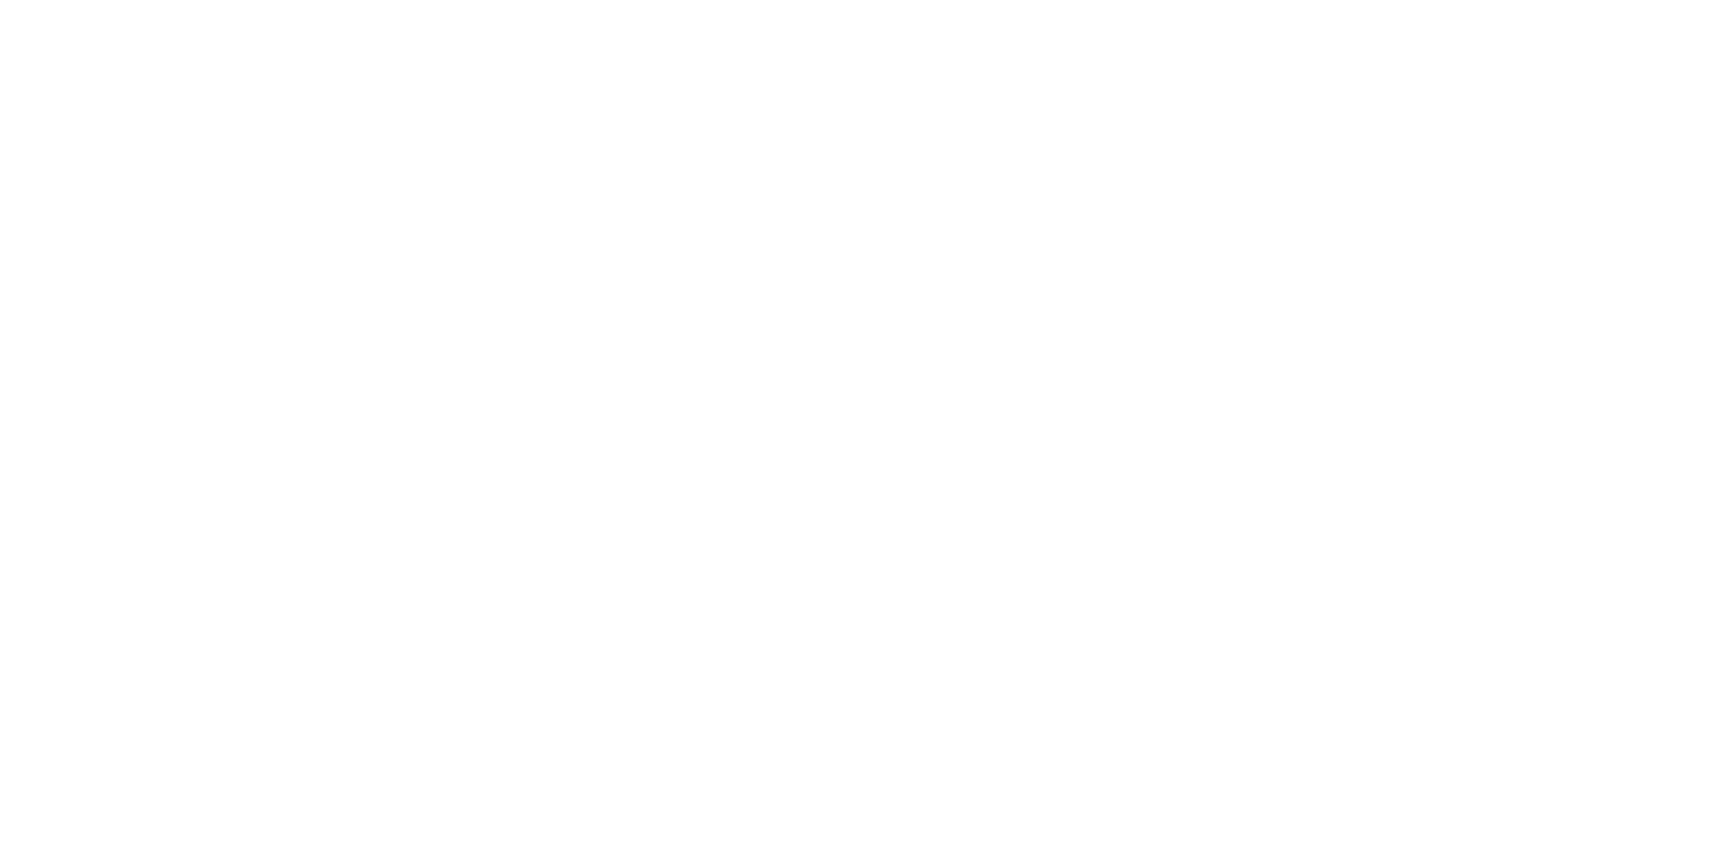
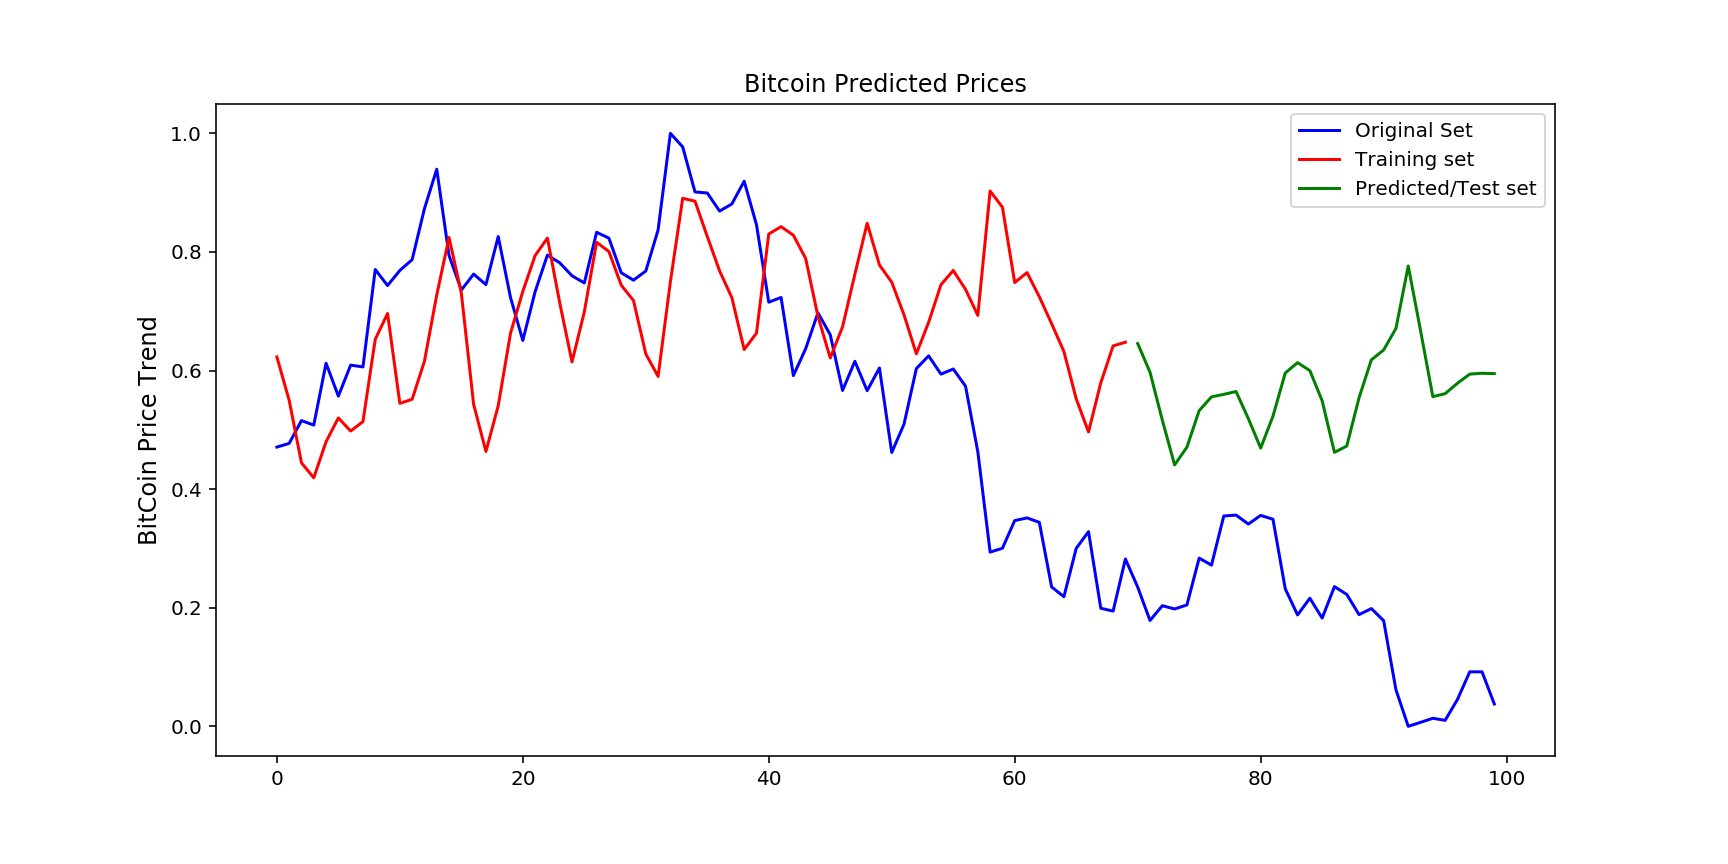

In [147]:
dashboard


In [131]:
dashboard.show()


Launching server at http://localhost:51883


In [133]:
def build_dashboard():
     return pn.Column(title, tabs)

if __name__.startswith("bokeh"):
    # start with panel serve script.py
    dashboard = build_dashboard()
    dashboard.servable()
if __name__ == "__main__":
    # start with python script.py
    dashboard = build_dashboard()
    dashboard.show(port=5009)

Launching server at http://localhost:5009
